# Imports

In [10]:
%matplotlib inline
import matplotlib.pyplot  as plt
import os
import random
from tqdm import trange, tqdm
import linecache
import shutil
import numpy as np
import math

## Config

In [2]:
cfg_num = 10000 # samples P or N
cfg_counts = 50 # samples from single line
cfg_length = 300 # length of sample

# Utils
read data from txt

In [3]:
def read_data(path):
    f = open(path)
    skylines = []
    lines = f.readlines()
    for line in lines:
        skyline = list(map(int, map(float, line.strip().split(',')[:-1])))
        skyline = [skyline[i] for i in range(1, len(skyline), 2)]
        skylines.append(skyline)
    f.close()
    return skylines

def read_data_row(path, num):       
    return linecache.getline(path,num)

1753


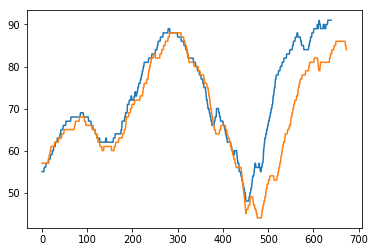

In [4]:
path_d = "./data/data_geo3k/dem.txt"
path_r = "./data/data_geo3k/real.txt"
skylines_d = read_data(path_d)
skylines_r = read_data(path_r)
print(len(skylines_d))
plt.plot(skylines_d[0])
plt.plot(skylines_r[0])

# datasets prepare

   构建训练样本和测试样本

In [ ]:
def datasets_prepare(lines_d, lines_r, train=True):
    if train:
        if "train" in os.listdir("./data/"):
            shutil.rmtree('./data/train')  
        os.mkdir("./data/train")
        
       
        # train P samples
        for i in trange(cfg_num):
            index = random.randint(0, len(lines_d)-1)
            for j in range(cfg_counts):
                left = random.randint(0, min(len(lines_d[index]), len(lines_r[index]))-cfg_length-1)
                right = left + cfg_length
                str_tmp = str(lines_r[index][left:right]).split('[')[1].split(']')[0].replace(' ', '') + ' ' \
                          + str(lines_d[index][left:right]).split('[')[1].split(']')[0].replace(' ', '') + ' ' \
                          + '1'
                with open("./data/train/{}.{}.txt".format(i, j), 'w') as f_a:
                    f_a.write(str_tmp)
        # train N samples       
        for i in trange(cfg_num, 2*cfg_num):
            index_d = random.randint(0, len(lines_d)-1)
            index_r = random.randint(0, len(lines_d)-1)
            if index_d == index_r:
                index_r += 1
            for j in range(cfg_counts):
                left = random.randint(0, min(len(lines_d[index_d]), len(lines_r[index_r]))-cfg_length-1)
                right = left + cfg_length
                str_tmp = str(lines_r[index_r][left:right]).split('[')[1].split(']')[0].replace(' ', '') + ' ' \
                          + str(lines_d[index_d][left:right]).split('[')[1].split(']')[0].replace(' ', '') + ' ' \
                          + '0'
                with open("./data/train/{}.{}.txt".format(i, j), 'w') as f_a:
                    f_a.write(str_tmp)
    else:
        if "test" in os.listdir("./data/"):
            shutil.rmtree('./data/test')  
        os.mkdir("./data/test")
        
            
        # test  sample 1000
        for i in trange(1000):
            index = random.randint(0, len(lines_d)-1)
            for j in range(1):
                left = random.randint(0, min(len(lines_d[index]), len(lines_r[index]))-cfg_length-1)
                right = left + cfg_length
                str_tmp = str(lines_r[index][left:right]).split('[')[1].split(']')[0].replace(' ', '') + ' ' \
                          + str(lines_d[index][left:right]).split('[')[1].split(']')[0].replace(' ', '') + ' ' \
                          + '1'
                with open("./data/test/{}.{}.txt".format(i, j), 'w') as f_a:
                    f_a.write(str_tmp)
#         # test N samples       
#         for i in trange(1000, 2000):
#             index_d = random.randint(0, len(lines_d)-1)
#             index_r = random.randint(0, len(lines_d)-1)
#             if index_d == index_r:
#                 index_r += 1
#             for j in range(1):
#                 left = random.randint(0, min(len(lines_d[index_d]), len(lines_r[index_r]))-cfg_length-1)
#                 right = left + cfg_length
#                 str_tmp = str(lines_r[index_r][left:right]).split('[')[1].split(']')[0].replace(' ', '') + ' ' \
#                           + str(lines_d[index_d][left:right]).split('[')[1].split(']')[0].replace(' ', '') + ' ' \
#                           + '0'
#                 with open("./data/test/{}.{}.txt".format(i, j), 'w') as f_a:
#                     f_a.write(str_tmp)
                
# build                
datasets_prepare(skylines_d[:1000], skylines_r[:1000], train=True)
datasets_prepare(skylines_d[1000:], skylines_r[1000:], train=False)

3
[1]


(0, 300)

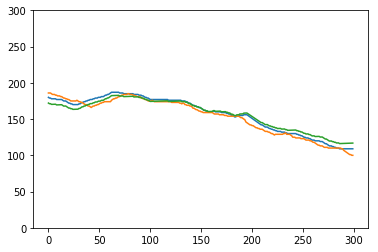

In [13]:
# visual data
id0 = random.randint(0, 19999)
id1 = random.randint(0, 49)
skyline_ = read_data_row("./data/train/{}.{}.txt".format(id0, id1), 1)
skyline = skyline_.strip().split(" ")
line0 = np.array(list(map(int, skyline[0].split(','))))
line1 = np.array(list(map(int, skyline[1].split(','))))
line2 = Rotate()(line0)
plt.plot(line0)
plt.plot(line1)
plt.plot(line2)
print(list(map(int, skyline[2])))
plt.ylim(0,300)

-22
-2


(0, 300)

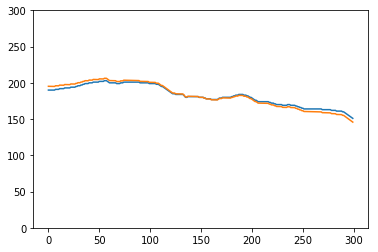

In [48]:
# show rotate and 
id0 = random.randint(0, 19999)
id1 = random.randint(0, 49)
skyline_ = read_data_row("./data/train/{}.{}.txt".format(id0, id1), 1)
skyline = skyline_.strip().split(" ")
line0 = np.array(list(map(int, skyline[0].split(','))))
line2 = Move()(line2)
line2 = Rotate()(line0)

plt.plot(line0)
plt.plot(line2)
plt.ylim(0,300)

In [42]:
class Rotate(object):
    def __call__(self, line):
        angle = random.randint(-6,6)
        print(angle)
        pointx = len(line)//2
        pointy = line[pointx]
        angle = float(angle) * 3.1415  / float(180)
        x = np.arange(len(line))
        y = (x-pointx) * math.sin(angle) + (line - pointy) * math.cos(angle) + pointy
        
        return y
    
class Move(object):
    def __call__(self, line):
        delta = random.randint(-30,30)
        print(delta)
        return line + delta

# 差值统计

In [26]:
root_path = "./data/train/"
filenames = os.listdir(root_path)
point_x = []
point_y = []
for filename in tqdm(filenames):
    skyline_ = read_data_row(os.path.join(root_path, filename), 1)
    skyline = skyline_.strip().split(" ")
    err = sum(abs(np.array(list(map(int, skyline[0].split(',')))) - 
            np.array(list(map(int, skyline[1].split(','))))))
    point_x.append(err)
    point_y.append(np.array(list(map(int, skyline[2])))[0]*10+5)



100%|██████████| 1000000/1000000 [03:23<00:00, 4908.46it/s]


<BarContainer object of 100000 artists>

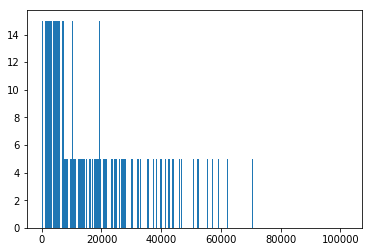

In [28]:
plt.bar(point_x[:100000], point_y[:100000])

(0, 100000)

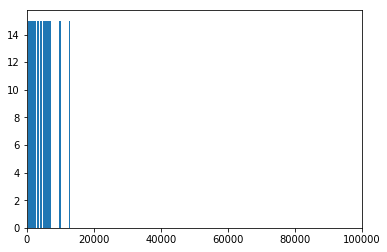

In [54]:
ptx = np.array(point_x[:100000])
pty = np.array(point_y[:100000])

plt.bar(ptx[pty==15], pty[pty==15])
plt.xlim(0, 100000)

(0, 15)

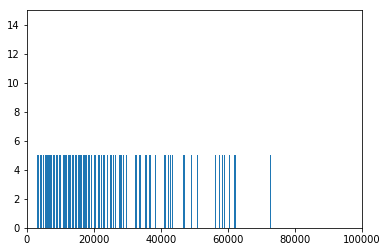

In [56]:
ptx = np.array(point_x[:100000])
pty = np.array(point_y[:100000])

plt.bar(ptx[pty==5], pty[pty==5])
plt.xlim(0, 100000)
plt.ylim(0, 15)

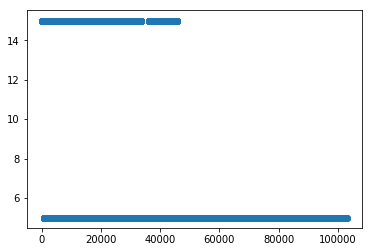

In [27]:
plt.scatter(point_x, point_y) 

In [55]:
print(len([point_x[i] for i in range(len(point_x)) if  point_x[i] < 1000 and point_y[i]==5]))

55
